# Movie Recommendation System

## Data Import

First, load the dataset and view the basic information.

In [1]:
import pandas as pd

# Load data
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# View Data
print("Movies Data:")
print(movies.head())
print("\nRatings Data:")
print(ratings.head())

# View basic data information
print("\nMovies Info:")
print(movies.info())
print("\nRatings Info:")
print(ratings.info())

# Checking for missing values
print("\nMovies Missing Values:")
print(movies.isnull().sum())
print("\nRatings Missing Values:")
print(ratings.isnull().sum())

Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119

Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Nul

This dataset has no missing data

## EDA

### Number of movies and number of ratings

In [2]:
print("Total Movies:", movies['movieId'].nunique())
print("Total Ratings:", len(ratings))
print("Total Users:", ratings['userId'].nunique())

Total Movies: 86537
Total Ratings: 33832162
Total Users: 330975


### Distribution of Ratings

C:\Users\chris\AppData\Local\Temp\ipykernel_26312\3803811567.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='viridis')


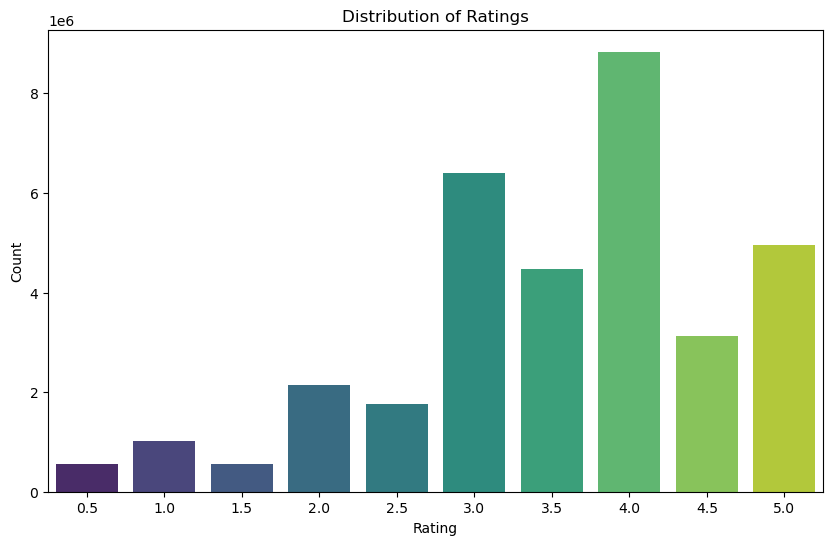

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- Ratings have significant peaks around 4.0 and 4.5, indicating that most users tend to give higher ratings.
- The lower number of ratings between 0.5 and 2.5 indicates that users are less likely to give low ratings.

### Most popular movies

In [ ]:
# Movie popularity analysis
movie_popularity = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
movie_popularity = movie_popularity.merge(movies, on='movieId')

C:\Users\chris\AppData\Local\Temp\ipykernel_26312\2894320623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='title', data=top_movies, palette='viridis')


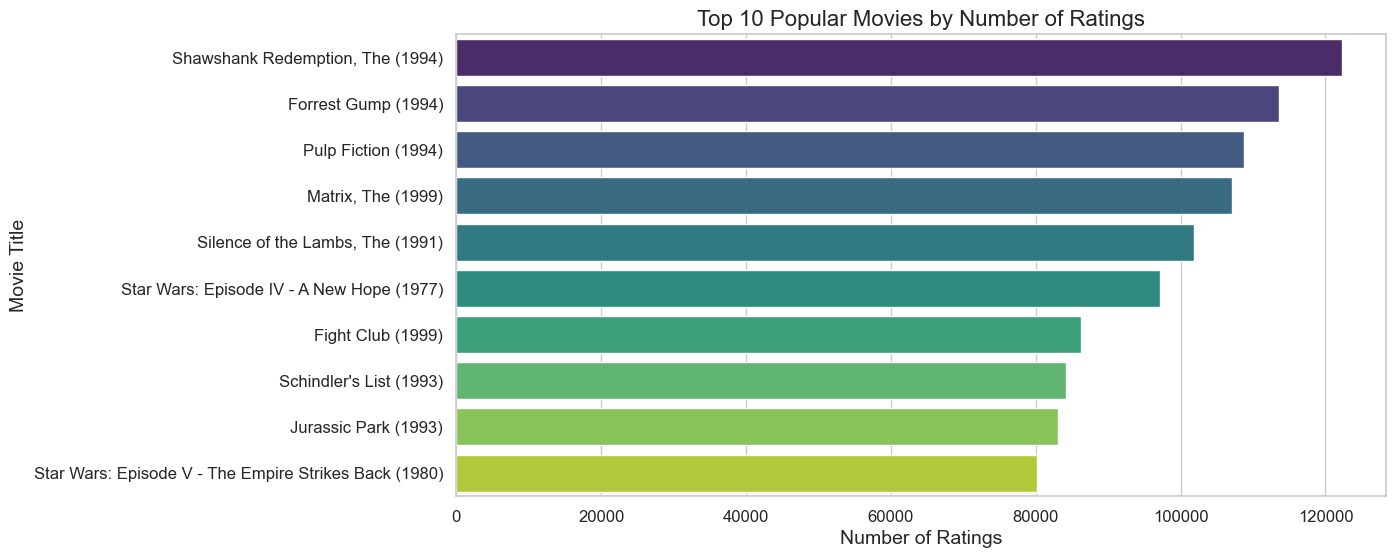

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='title', data=top_movies, palette='viridis')
plt.title('Top 10 Popular Movies by Number of Ratings', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_26312\1837012558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='title', data=top_movies, palette='magma')


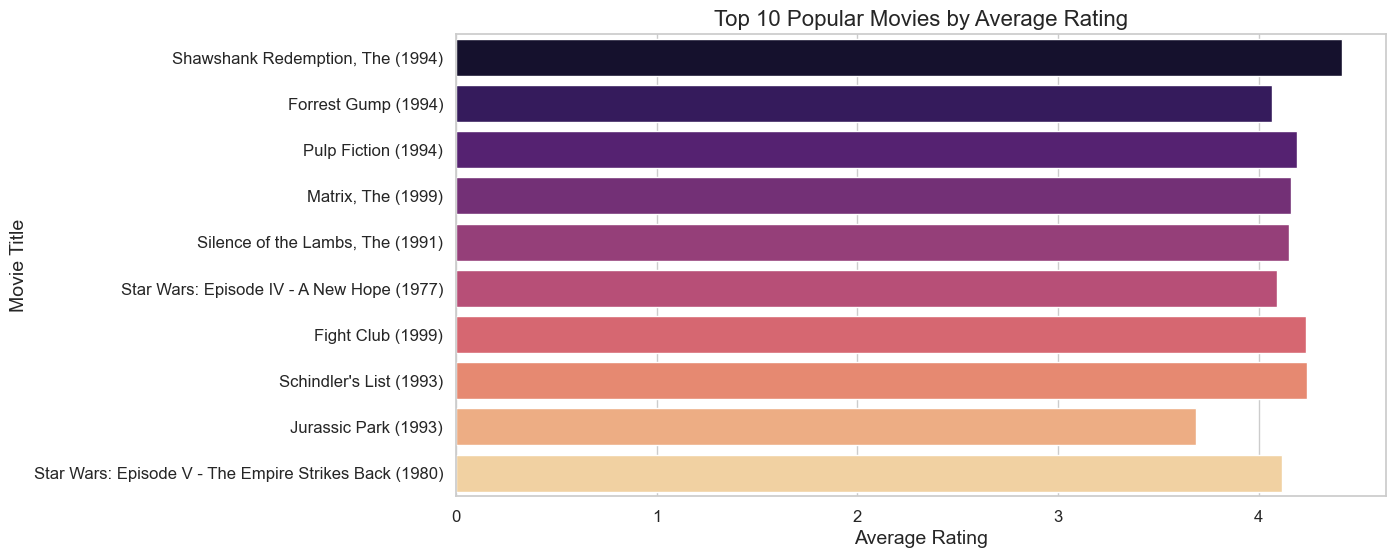

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='mean', y='title', data=top_movies, palette='magma')
plt.title('Top 10 Popular Movies by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Movie Title', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Data preprocessing

### Filter
Filter criteria: users have rated at least 50 movies, movies have been rated at least 50 times

In [7]:
# Make sure rating_count is a numeric type
user_ratings_count['rating_count'] = user_ratings_count['rating_count'].astype(int)
movie_ratings_count['rating_count'] = movie_ratings_count['rating_count'].astype(int)

min_user_ratings = user_ratings_count['rating_count'].quantile(0.75) 
min_movie_ratings = movie_ratings_count['rating_count'].quantile(0.75)

# Filter Users
filtered_users = user_ratings_count[user_ratings_count['rating_count'] >= min_user_ratings]['userId']
filtered_ratings = ratings[ratings['userId'].isin(filtered_users)]

# Filter Movies
filtered_movies = movie_ratings_count[movie_ratings_count['rating_count'] >= min_movie_ratings]['movieId']
filtered_ratings = filtered_ratings[filtered_ratings['movieId'].isin(filtered_movies)]

print("Filtered Ratings:", len(filtered_ratings))

Filtered Ratings: 26556635


### timestamp processing

In [8]:
# Time stamp conversion
import datetime
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))


from sklearn.preprocessing import MultiLabelBinarizer

movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['genres']), columns=mlb.classes_, index=movies.index)
movies = pd.concat([movies, genres_encoded], axis=1)

print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  (no genres listed)  \
0  [Adventure, Animation, Children, Comedy, Fantasy]                   0   
1                     [Adventure, Children, Fantasy]                   0   
2                                  [Comedy, Romance]                   0   
3                           [Comedy, Drama, Romance]                   0   
4                                           [Comedy]                   0   

   Action  Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  \
0       0          1          1         1       1      0  ...          0   
1       0          1          0         1       0      0  ...          0   
2       0     

In [9]:
# User characteristics: average rating and number of ratings
user_features = ratings.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()
user_features.columns = ['userId', 'user_mean_rating', 'user_rating_count']
user_features['user_rating_variance'] = ratings.groupby('userId')['rating'].var().fillna(0)
user_features['user_last_rating_time'] = ratings.groupby('userId')['timestamp'].max()

# Movie features: average rating and number of ratings
movie_features = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
movie_features.columns = ['movieId', 'movie_mean_rating', 'movie_rating_count']
movie_features['movie_rating_variance'] = ratings.groupby('movieId')['rating'].var().fillna(0)

# Merger features
ratings = ratings.merge(user_features, on='userId')
ratings = ratings.merge(movie_features, on='movieId')

print(ratings.head())

   userId  movieId  rating           timestamp  user_mean_rating  \
0       1        1     4.0 2008-11-04 01:52:19          4.008065   
1       1      110     4.0 2008-11-05 14:04:46          4.008065   
2       1      158     4.0 2008-11-04 01:31:43          4.008065   
3       1      260     4.5 2008-11-04 02:00:04          4.008065   
4       1      356     5.0 2008-11-04 01:58:39          4.008065   

   user_rating_count  user_rating_variance user_last_rating_time  \
0                 62                   NaN                   NaT   
1                 62                   NaN                   NaT   
2                 62                   NaN                   NaT   
3                 62                   NaN                   NaT   
4                 62                   NaN                   NaT   

   movie_mean_rating  movie_rating_count  movie_rating_variance  
0           3.893508               76813                    NaN  
1           3.996166               75514          

## Model training

In [10]:
from surprise.model_selection import train_test_split

from surprise import Dataset, Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(filtered_ratings[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

In [11]:
from surprise import SVD
from surprise import accuracy

algo_svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)

algo_svd.fit(trainset)

predictions_svd = algo_svd.test(testset)

accuracy.rmse(predictions_svd)

RMSE: 0.7500


0.7500370759577311

In [12]:
print("SVD MAE:", accuracy.mae(predictions_svd))

MAE:  0.5666
SVD MAE: 0.5665956585688692


### Evaluate the quality of recommendation results using metrics such as Precision@K, Recall@K

In [22]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = {}
    recalls = {}
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

precisions, recalls = precision_recall_at_k(predictions_svd, k=10, threshold=3.5)
print("Precision@10:", sum(precisions.values()) / len(precisions))
print("Recall@10:", sum(recalls.values()) / len(recalls))

Precision@10: 0.8913212371583187
Recall@10: 0.269356411796397


In [17]:
def recommend_movies(user_id, algo, unrated_movies, n=10):
    recommendations = []
    for movie_id in unrated_movies['movieId']:
        predicted_rating = algo.predict(user_id, movie_id).est
        recommendations.append((movie_id, predicted_rating))
    
    # Sort
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n]

# Get movies not rated by users
def get_unrated_movies(user_id, ratings, movies):
    rated_movies = ratings[ratings['userId'] == user_id]['movieId']
    unrated_movies = movies[~movies['movieId'].isin(rated_movies)]
    return unrated_movies

## Generate recommendations

### Example: Suggesting a movie for user ID 91

In [21]:
user_id = 91

unrated_movies = get_unrated_movies(user_id, filtered_ratings, movies)
top_recommendations = recommend_movies(user_id, algo_svd, unrated_movies, n=10)

print("Top 10 Recommended Movies for User", user_id)
for movie_id, predicted_rating in top_recommendations:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating:.2f}")

Top 10 Recommended Movies for User 91
Movie: Planet Earth (2006), Predicted Rating: 4.40
Movie: Planet Earth II (2016), Predicted Rating: 4.39
Movie: Band of Brothers (2001), Predicted Rating: 4.33
Movie: Cosmos: A Spacetime Odissey, Predicted Rating: 4.30
Movie: Blue Planet II (2017), Predicted Rating: 4.30
Movie: Twelve Angry Men (1954), Predicted Rating: 4.30
Movie: Shawshank Redemption, The (1994), Predicted Rating: 4.28
Movie: Baseball (1994), Predicted Rating: 4.27
Movie: Cosmos, Predicted Rating: 4.26
Movie: Connections (1978), Predicted Rating: 4.26
